# Regressao Linear Categórica

O dataset utilizado nesse exercício será o [Price Car](https://github.com/rmadan16/LinearRegression_CarPrice).o csv e fazer o upload no colab.

Ele contém a informação sobre a venda de carros usados e informações do carro como:
- Nome do carro
- Tipo de Combustível
- Número de portas
- Comprimento / Largura / Altura
- Outros variáveis
- Preço de venda

Nesse exercício iremos aplicar o conceito de transformação categórica na coluna de **carbody** e desenvolver um modelo de Regressão Linear e avaliar seu desempenho.

##  Importação da bibliotecas e do dataset utilizado

In [50]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/rmadan16/LinearRegression_CarPrice/master/CarPrice_Assignment.csv')

In [3]:
display(df)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Criação do DataFrame filtragem da coluna [carbody, price]

In [40]:
df = df[['carbody', 'price']]

##  Distribuição do preço de acordo com o carbody

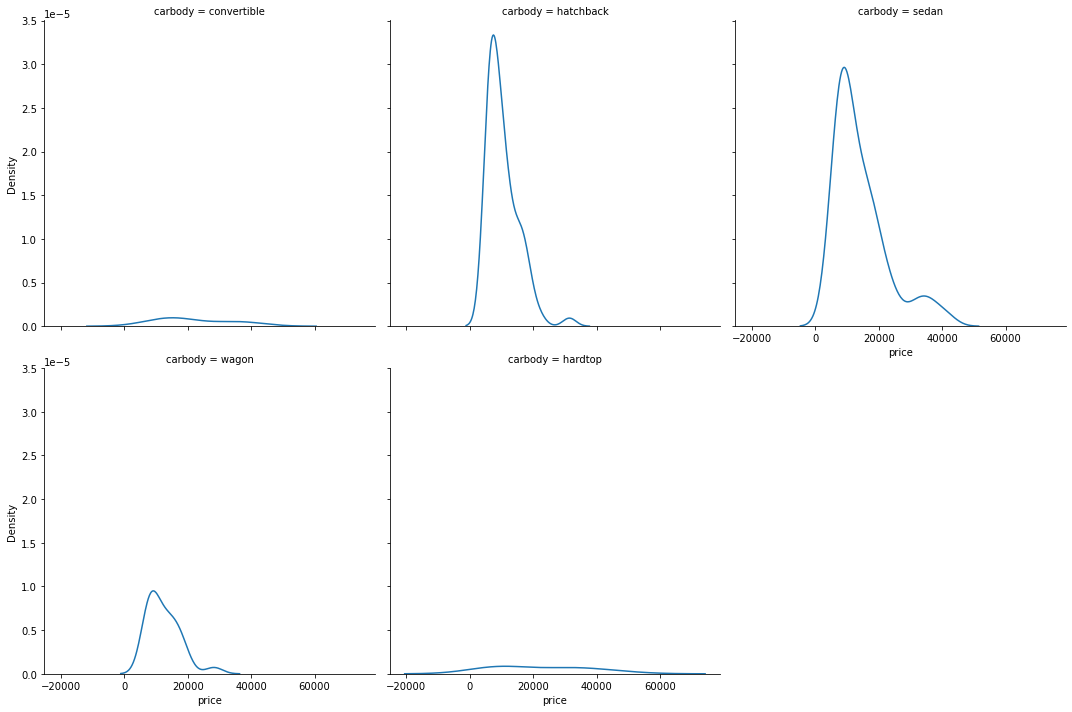

In [13]:
sns.displot(data=df, x='price', col='carbody', col_wrap=3, kind='kde')
plt.show()

<AxesSubplot:xlabel='carbody'>

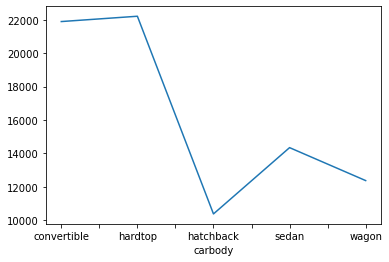

In [28]:
df.groupby('carbody')['price'].mean().plot()

## Transformações da variável categórica 

### Usando o get_dummies do pandas

In [38]:
df = pd.get_dummies(df)
df

,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,13495.0,1,0,0,0,0
1,16500.0,1,0,0,0,0
2,16500.0,0,0,1,0,0
3,13950.0,0,0,0,1,0
4,17450.0,0,0,0,1,0
...,...,...,...,...,...,...
200,16845.0,0,0,0,1,0
201,19045.0,0,0,0,1,0
202,21485.0,0,0,0,1,0
203,22470.0,0,0,0,1,0


### Usando o OneHotEncoder

In [42]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df['carbody'].values.reshape(-1,1))

df_tf = pd.DataFrame(encoder.transform(df['carbody'].values.reshape(-1,1)).toarray().astype(int),
                    columns=encoder.categories_)
df_tf['price'] = df['price']
df_tf

,convertible,hardtop,hatchback,sedan,wagon,price
0,1,0,0,0,0,13495.0
1,1,0,0,0,0,16500.0
2,0,0,1,0,0,16500.0
3,0,0,0,1,0,13950.0
4,0,0,0,1,0,17450.0
...,...,...,...,...,...,...
200,0,0,0,1,0,16845.0
201,0,0,0,1,0,19045.0
202,0,0,0,1,0,21485.0
203,0,0,0,1,0,22470.0


##  Treinamento e validação do modelo

### Separar Treino X Teste

In [45]:
X = df_tf.iloc[:,:-1]
y = df_tf[['price']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

### Treinar modelo

In [48]:
#Chamar a função do modelo para cada variável
LinearRegression1 = LinearRegression()

#Treinar o modelo 
LinearRegression1.fit(X_train,y_train)

#Predizer os valores de teste 
y_pred_1 = LinearRegression1.predict(X_test)

### Calcular métricas do modelo

- Fórmula da regressão
- MSE
- RMSE
- R²

In [51]:
print(f'Fórmula: y={LinearRegression1.intercept_} {LinearRegression1.coef_[0]} x')
print(f'MSE: {metrics.mean_absolute_error(y_test,y_pred_1)}')
print(f'RMSE: {metrics.mean_squared_error(y_test,y_pred_1)}')
print(f'RSquared: {metrics.r2_score(y_test,y_pred_1)}')

Fórmula: y=[17476.33289081] [10416.66710919  4732.16710919 -6877.40633149 -3426.25289081
 -4845.17499607] x
MSE: 5974.972507234393
RMSE: 57856640.58120522
RSquared: -0.08350417717925973
